<a href="https://colab.research.google.com/github/Sanj21github/coding4git/blob/main/BitcoinPrediction_ARIMA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install yfinance

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.9/55.9 KB 2.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 111.0/111.0 KB 4.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 112.2/112.2 KB 12.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 128.2/128.2 KB 15.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.2/4.2 MB 40.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.8/62.8 KB 6.2 MB/s eta 0:00:00
  Attempting uninstall: requests
    Found existing installation: requests 2.25.1
    Uninstalling requests-2.25.1:
      Successfully uninstalled requests-2.25.1
  Attempting uninstall: html5lib
    Found existing installation: html5lib 1.0.1
    Uninstalling html5lib-1.0.1:
      Successfully uninstalled html5lib-1.0.1
  Attempting uninstall: beautifulsoup4
    Found existing installation: beautifulsoup4 4.6.3
   

In [ ]:
import yfinance as yf

In [ ]:
df=yf.download('BTC-USD')

[*********************100%***********************]  1 of 1 completed


In [ ]:
df

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2014-09-17 00:00:00+00:00,465.864014,468.174011,452.421997,457.334015,457.334015,21056800
2014-09-18 00:00:00+00:00,456.859985,456.859985,413.104004,424.440002,424.440002,34483200
2014-09-19 00:00:00+00:00,424.102997,427.834991,384.532013,394.795990,394.795990,37919700
2014-09-20 00:00:00+00:00,394.673004,423.295990,389.882996,408.903992,408.903992,36863600
2014-09-21 00:00:00+00:00,408.084991,412.425995,393.181000,398.821014,398.821014,26580100
...,...,...,...,...,...,...
2023-01-26 00:00:00+00:00,23108.955078,23237.078125,22911.373047,23032.777344,23032.777344,26357839322
2023-01-27 00:00:00+00:00,23030.716797,23417.720703,22654.593750,23078.728516,23078.728516,25383335641
2023-01-28 00:00:00+00:00,23079.964844,23165.896484,22908.845703,23031.089844,23031.089844,14712928379


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error,mean_absolute_error

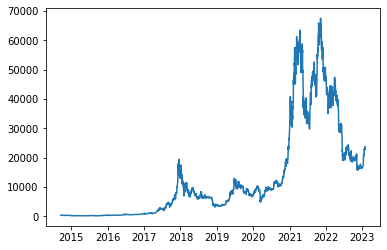

In [ ]:
plt.plot(df.index,df['Adj Close'])
plt.show()

In [ ]:
#train test split
to_row=int(len(df)*0.9)
training_data=list(df[0:to_row]['Adj Close'])
testing_data=list(df[to_row:]['Adj Close'])
testing_data

[45538.67578125,
 46281.64453125,
 45868.94921875,
 46453.56640625,
 46622.67578125,
 45555.9921875,
 43206.73828125,
 43503.84765625,
 42287.6640625,
 42782.13671875,
 42207.671875,
 39521.90234375,
 40127.18359375,
 41166.73046875,
 39935.515625,
 40553.46484375,
 40424.484375,
 39716.953125,
 40826.21484375,
 41502.75,
 41374.37890625,
 40527.36328125,
 39740.3203125,
 39486.73046875,
 39469.29296875,
 40458.30859375,
 38117.4609375,
 39241.12109375,
 39773.828125,
 38609.82421875,
 37714.875,
 38469.09375,
 38529.328125,
 37750.453125,
 39698.37109375,
 36575.140625,
 36040.921875,
 35501.953125,
 34059.265625,
 30296.953125,
 31022.90625,
 28936.35546875,
 29047.751953125,
 29283.103515625,
 30101.265625,
 31305.11328125,
 29862.91796875,
 30425.857421875,
 28720.271484375,
 30314.333984375,
 29200.740234375,
 29432.2265625,
 30323.72265625,
 29098.91015625,
 29655.5859375,
 29562.361328125,
 29267.224609375,
 28627.57421875,
 28814.900390625,
 29445.95703125,
 31726.390625,
 3179

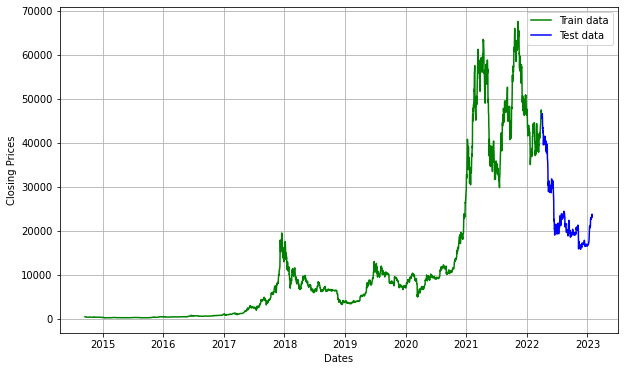

In [ ]:
plt.figure(figsize=(10,6))
plt.grid(True)
plt.xlabel('Dates')
plt.ylabel('Closing Prices')
plt.plot(df[0:to_row]['Adj Close'],'green', label='Train data')
plt.plot(df[to_row:]['Adj Close'],'blue', label='Test data')
plt.legend()

ARIMA MODEL 

In [ ]:
model_predictions=[]
n_test_obser=len(testing_data)

In [ ]:
for i in range(n_test_obser):
  model=ARIMA(training_data,order=(4,1,0))
  model_fit=model.fit()
  output=model_fit.forecast()
  yhat=list(output[0])[0]
  model_predictions.append(yhat)
  actual_test_value=testing_data[i]
  training_data.append(actual_test_value)
  

/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


In [ ]:
print(model_fit.summary())


                             ARIMA Model Results                              
Dep. Variable:                    D.y   No. Observations:                 3668
Model:                 ARIMA(4, 1, 0)   Log Likelihood              -30355.537
Method:                       css-mle   S.D. of innovations            950.354
Date:                Mon, 30 Jan 2023   AIC                          60723.073
Time:                        12:28:14   BIC                          60760.318
Sample:                             1   HQIC                         60736.334
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          6.3569     16.538      0.384      0.701     -26.057      38.771
ar.L1.D.y     -0.0161      0.017     -0.973      0.331      -0.048       0.016
ar.L2.D.y      0.0161      0.016      0.975      0.3

In [ ]:
len(testing_data)

306

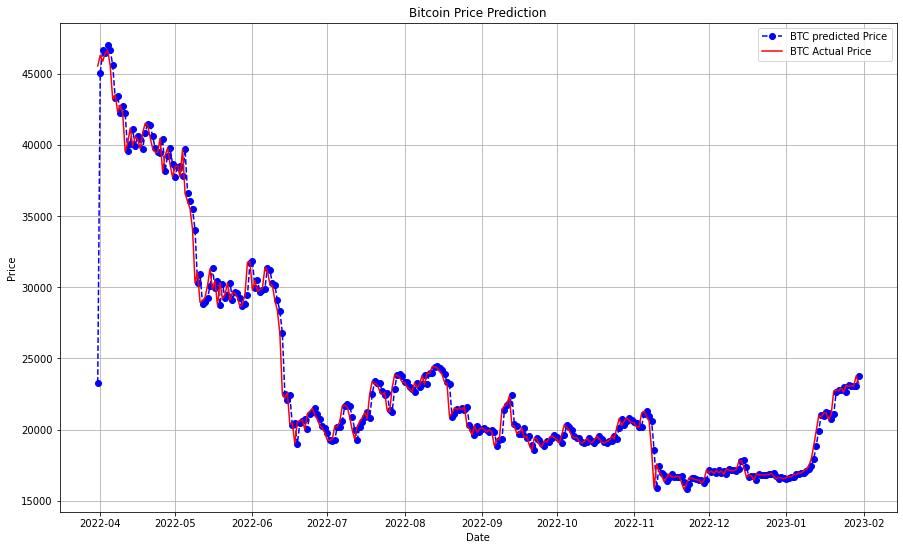

In [ ]:
plt.figure(figsize=(15,9))
plt.grid(True)
data_range=df[to_row:].index
plt.plot(data_range,model_predictions,color='blue',marker='o',linestyle='dashed',label='BTC predicted Price')
plt.plot(data_range,testing_data,color='red',label='BTC Actual Price')

plt.title('Bitcoin Price Prediction')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

Report Performance


In [ ]:
mape=np.mean(np.abs(np.array(model_predictions)-np.array(testing_data))/np.abs(testing_data))
print("Mean absolute Percentage error:"+str(mape))
#around 2.3% of absolute percentage error and it implies that the model is 97.7% accurate in predicting the test set observation

Mean absolute Percentage error:0.023314204778638787
